In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 110 kB 9.6 MB/s 
     |████████████████████████████████| 112 kB 52.5 MB/s 
     |████████████████████████████████| 4.0 MB 48.4 MB/s 
     |████████████████████████████████| 128 kB 64.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


**Importing Dataset**

In [ ]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")
sp500.index = pd.to_datetime(sp500.index) # made date as the index

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,0.0,0.0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,0.0,0.0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,0.0,0.0


**Plotting**

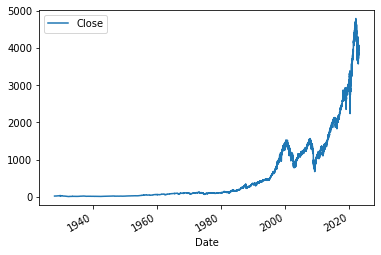

In [ ]:
sp500.plot.line(y="Close", use_index=True)

**Editing the dataset**

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])
ds_lr = sp500[:-1]
ds_lr

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-12-16 00:00:00-05:00,3890.909912,3890.909912,3827.909912,3852.360107,7493660000,3817.659912,0
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,3821.620117,1
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,3878.439941,1


In [ ]:
#Importing the basic librarires for building model

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.linear_model import LinearRegression

In [ ]:
#Defined X value and y value , and split the data train
ds_lr = ds_lr.dropna(subset=ds_lr.columns[ds_lr.columns == "Tomorrow"])
X = ds_lr.iloc[:, ~ds_lr.columns.isin(["Target"])]         
Y = ds_lr.loc[:, "Target"] 

X1 = ds_lr.iloc[:, ~ds_lr.columns.isin(["Open", "High", "Low", "Volume", "Target"])]         
Y1 = ds_lr.loc[:, "Target"] 

# split the data train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

X1_train

#print("X Train : ", X_train.shape)
#print("X Test  : ", X_test.shape)
#print("Y Train : ", Y_train.shape)
#print("Y Test  : ", Y_test.shape)

,Close,Tomorrow
Date,,
2009-09-04 00:00:00-04:00,1016.400024,1025.390015
2008-05-30 00:00:00-04:00,1400.380005,1385.670044
1998-08-12 00:00:00-04:00,1084.219971,1074.910034
1991-03-14 00:00:00-05:00,373.500000,373.589996
2015-06-26 00:00:00-04:00,2101.489990,2057.639893
...,...,...
2012-09-28 00:00:00-04:00,1440.670044,1444.489990
2010-08-05 00:00:00-04:00,1125.810059,1121.640015
2011-05-19 00:00:00-04:00,1343.599976,1333.270020


In [ ]:
LR = LinearRegression()

LR.fit(X_train,Y_train)
ypred = LR.predict(X_test)
print(r2_score(Y_test,ypred)*100)

32.10842719843533
